szukanie zależności pomiędzy badanymi wartościami wśród pacjentów po przeszczepie serca 
obliczanie parametrów analizy statystycznej i tworzenie histogramów dla wybranych kolumn
generowanie skoroszytu korelacji pomiędzy wybranymi parametrami
drukowanie wykresów regresji wielomianowej (do 10 stopnia wielomianu) dla parametrów, których korelacja jest mniejsza niż -0.5 lub większa niż 0.5

In [1]:
import pandas as pd
import os
import openpyxl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

folder_path = 'C:\\Users\\jmmbo\\Downloads\\pacjenci'
pacjenci = []

if os.path.isdir(folder_path):
    print("Przeszukiwanie folderu:", folder_path)
    znalezione_pliki = False
    for plik in os.listdir(folder_path):
        if plik.endswith('.xlsx') and not plik.startswith('~$'):
            znalezione_pliki = True
            pacjenci.append(plik)


rows = ['Pole pow. l. przeds.', 'LAESV (A-L BIP)', 'LAESV (MOD BIP)', 
      'LVCO (4D Auto LVQ)', 'LVEF (Teich)', 'LVEF (4D Auto LVQ)',
      'GLPS (4D Auto LVQ)','LVIDd','LVIDs', 'IVSd', 'Masa LVd (4D Auto LVQ)',
      'LVPWd', 'LVSV (Teich)', 'LVSV (4D Auto LVQ)', 'LVCO (MOD BIP)',
      'LVEF (Auto EF BIP)', 'LVSV (Auto EF BIP)', 'LVEDV (Auto EF BIP)',
      'LVESV (Auto EF BIP)', 'RAA (s)', 'TAPSE']

combined_data = pd.DataFrame()

for pacjent in pacjenci:
    file_path = os.path.join(folder_path, pacjent)
    file = pd.read_excel(file_path)
    for value in rows:
        filter = file["Krótka etykieta"] == value
        filtered_data = file[filter]
        filtered_data.insert(0, 'nazwa pacjenta', pacjent)
        selected_columns = ['nazwa pacjenta', 'Krótka etykieta', 'Zapisana wartość']
        filtered_data = filtered_data[selected_columns]
        combined_data = pd.concat([combined_data, filtered_data])

pivot_data = combined_data.pivot_table(index='nazwa pacjenta', columns='Krótka etykieta', values='Zapisana wartość', aggfunc='first')

Przeszukiwanie folderu: C:\Users\jmmbo\Downloads\pacjenci


In [2]:
output_file = os.path.join(folder_path, 'output', 'wybrane_dane_pacjentów.xlsx')
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    pivot_data.to_excel(writer, index=True, sheet_name='out')

In [3]:
import numpy as np
pd.options.mode.chained_assignment = None
#df = pd.read_excel(output_file)

df = pd.read_excel(output_file)
for index, pacjent in enumerate(pacjenci):
    for row in rows:
        df[row][index] = float(str(df[row][index]).split(' ')[0])

In [26]:
def licz_srednia(lista):
    suma = 0
    liczba_el = 0
    for element in lista:
        if element != np.nan:
            suma += element
            liczba_el += 1
    return suma/liczba_el

for value in rows:
    values = df[f'{value}'].dropna().tolist()
    srednia = licz_srednia(values)
    odchylenie = np.std(values)
    liczba_el = licz_el(values)
    print(f'srednia dla {value} wynosi {srednia}, a odchylenie standardowe wynosi {odchylenie}')

srednia dla Pole pow. l. przeds. wynosi 25.1688642581342, a odchylenie standardowe wynosi 6.827042615515194
srednia dla LAESV (A-L BIP) wynosi 92.78757090867518, a odchylenie standardowe wynosi 45.690375456650855
srednia dla LAESV (MOD BIP) wynosi 83.02721694913917, a odchylenie standardowe wynosi 36.02805284414719
srednia dla LVCO (4D Auto LVQ) wynosi 5.899897538387293, a odchylenie standardowe wynosi 1.6620478233526716
srednia dla LVEF (Teich) wynosi 62.26490083046201, a odchylenie standardowe wynosi 10.534506265172878
srednia dla LVEF (4D Auto LVQ) wynosi 54.67159396628466, a odchylenie standardowe wynosi 7.4140465774582704
srednia dla GLPS (4D Auto LVQ) wynosi -14.78723231703043, a odchylenie standardowe wynosi 4.335261502409303
srednia dla LVIDd wynosi 4.859429304715731, a odchylenie standardowe wynosi 0.6159970868944787
srednia dla LVIDs wynosi 3.2170830633272, a odchylenie standardowe wynosi 0.6995219620423389
srednia dla IVSd wynosi 1.1429303546461622, a odchylenie standardowe 

C:\Users\jmmbo\AppData\Local\Temp\ipykernel_4992\778391139.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


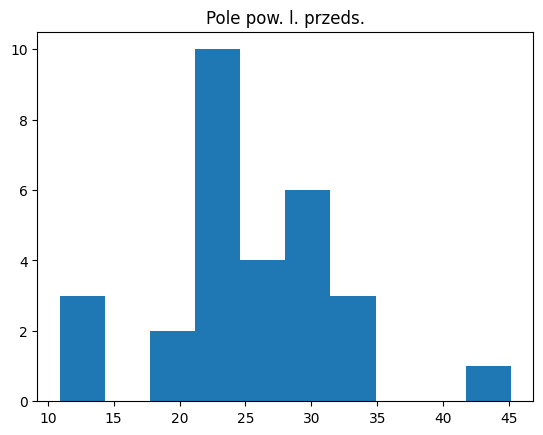

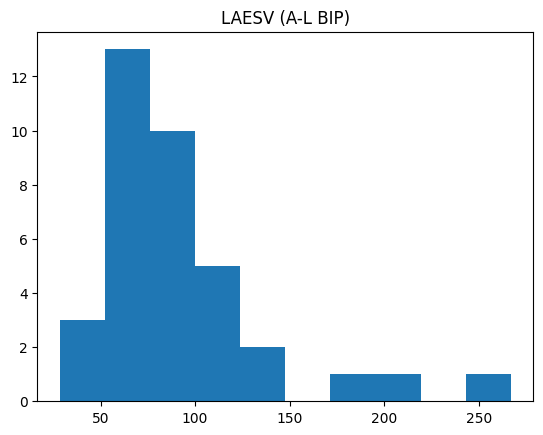

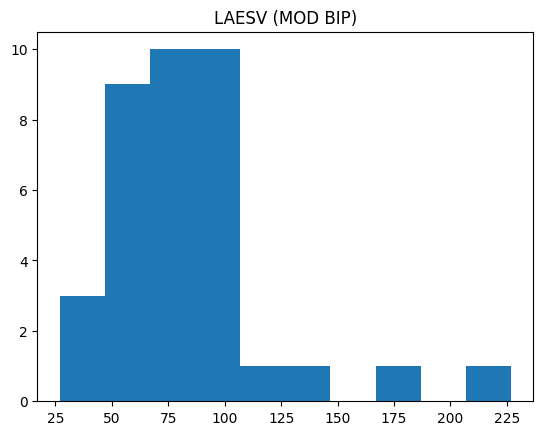

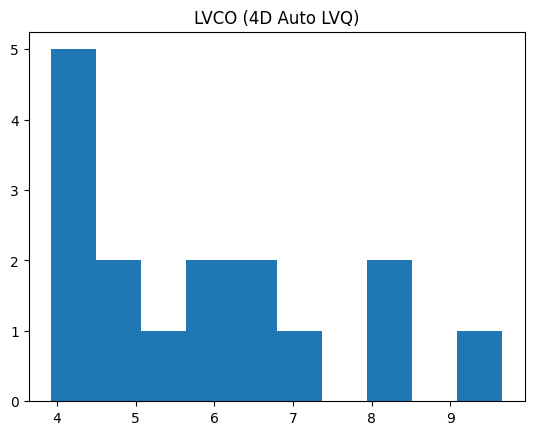

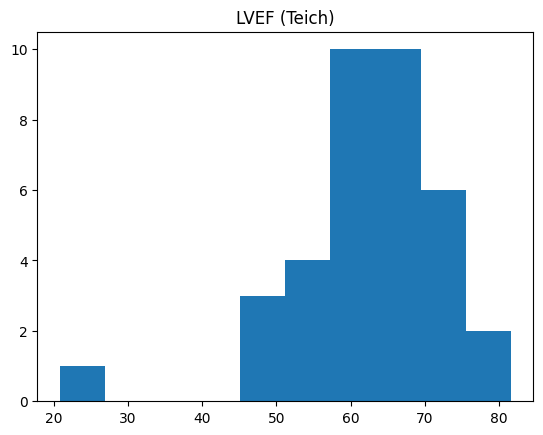

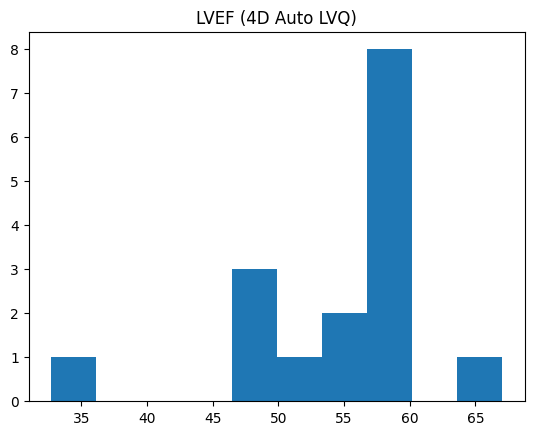

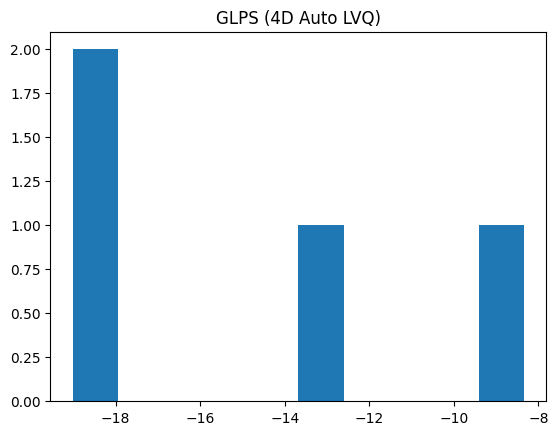

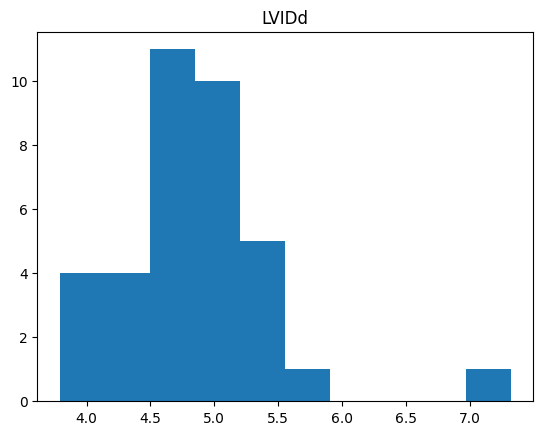

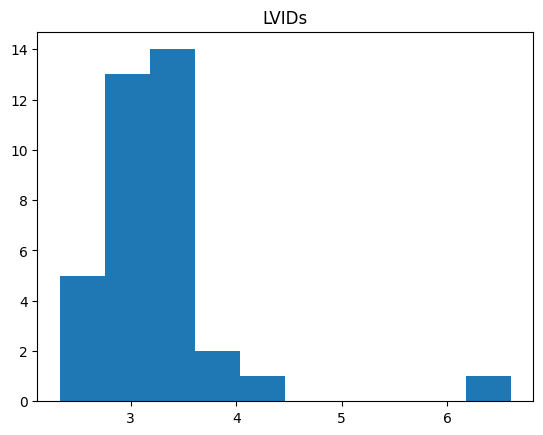

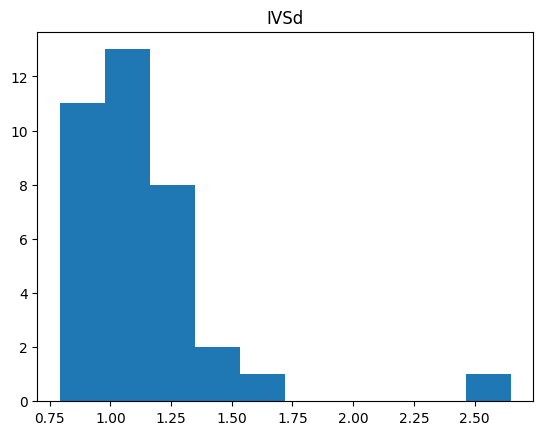

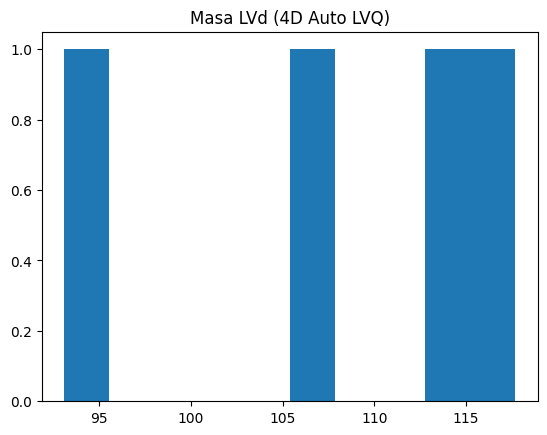

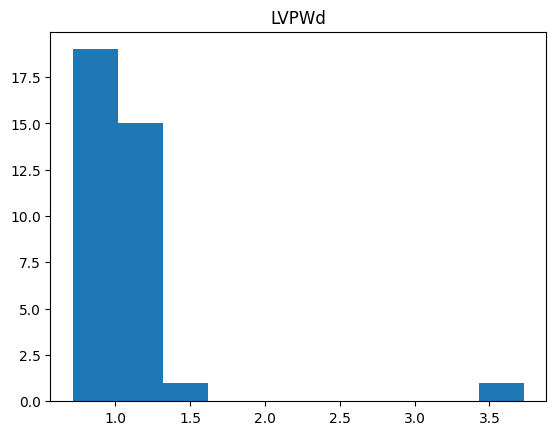

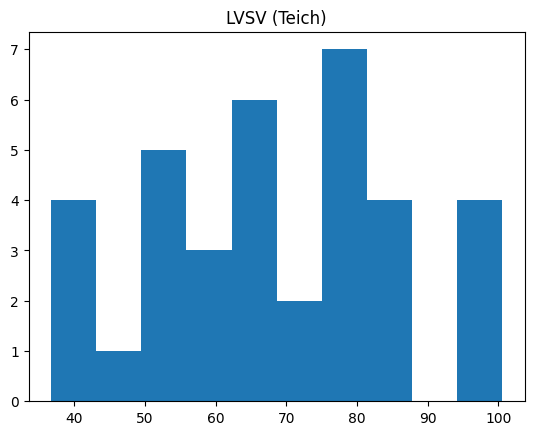

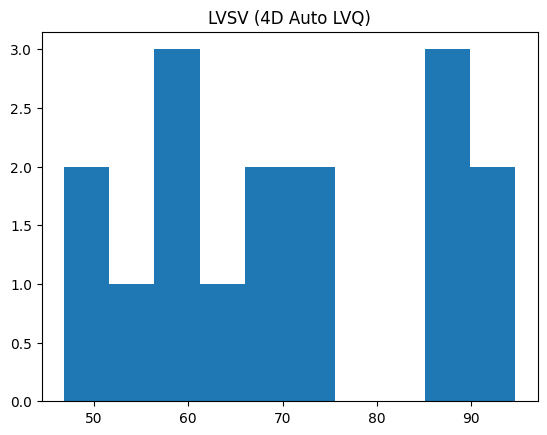

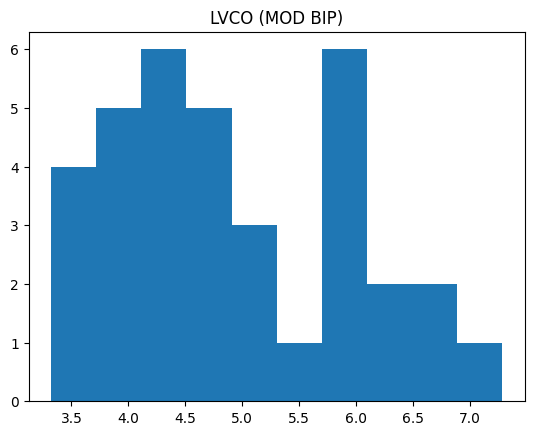

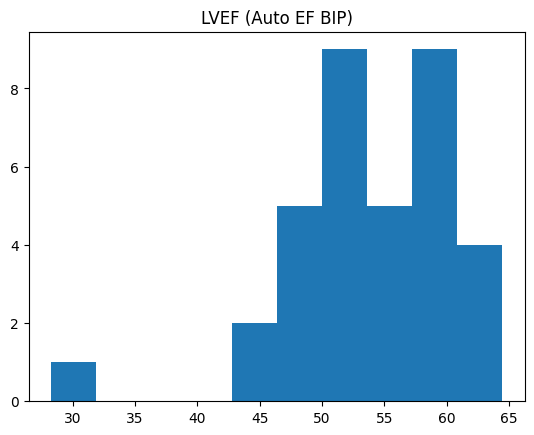

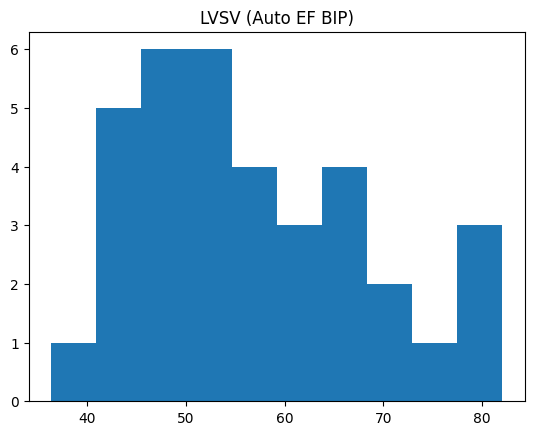

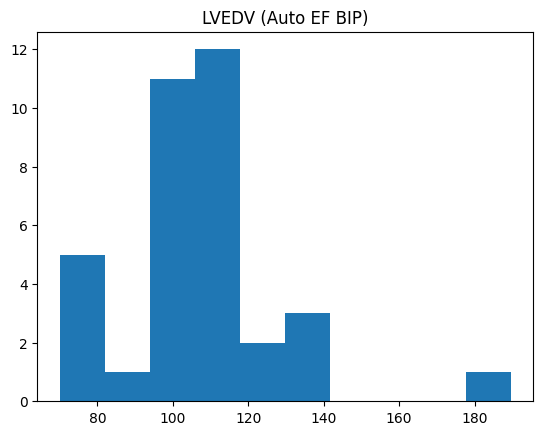

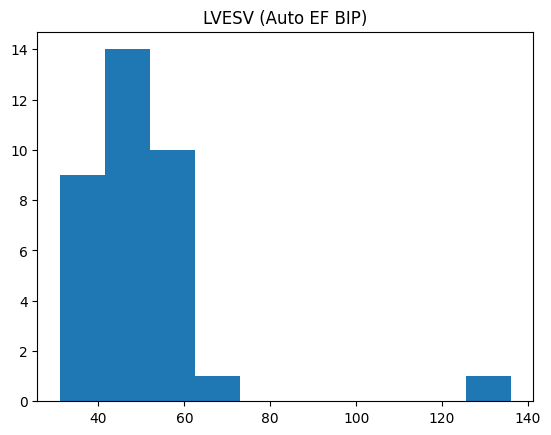

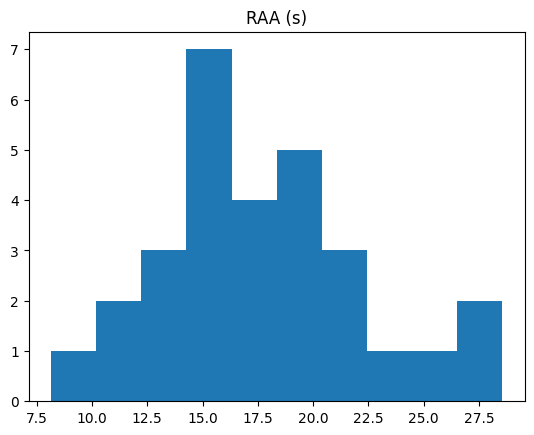

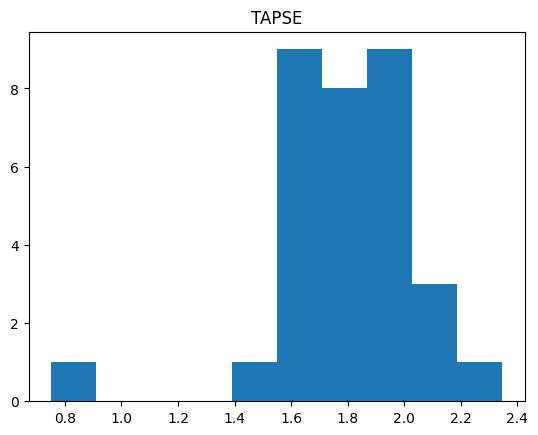

In [5]:
for value in rows:
    values = df[f'{value}'].dropna().tolist()
    plt.figure()
    plt.hist(values)
    plt.title(f'{value}')
    plt.show

In [6]:
for value in rows:
    df[value] = df[value].dropna()
print(df)

    nazwa pacjenta  GLPS (4D Auto LVQ)      IVSd LAESV (A-L BIP)  \
0   fMacL_012.xlsx          -13.316242  0.820337       48.012516   
1   fMilS_002.xlsx                 NaN  0.908217        62.94594   
2   fWawA_006.xlsx                 NaN  2.649397       73.051742   
3   fZimR_009.xlsx                 NaN  1.271071       75.167018   
4   mChoB_007.xlsx                 NaN      0.94           78.46   
5   mChrJ_001.xlsx                 NaN      1.01           97.46   
6   mDawD_012.xlsx                 NaN  1.109307       98.872708   
7   mDawM_005.xlsx                 NaN  1.082329       89.838876   
8   mDerK_000.xlsx                 NaN  1.027461       95.665425   
9   mFigP_002.xlsx                 NaN  1.000355       107.06531   
10  mGruG_009.xlsx                 NaN  1.296023       83.858002   
11  mHopJ_003.xlsx                 NaN      0.95           66.52   
12  mIliM_012.xlsx          -19.006154  1.037073       53.357463   
13  mKacA_003.xlsx                 NaN  1.189519

In [7]:
scaled_file = os.path.join(folder_path, 'output', 'skalowane_dane.xlsx')
with pd.ExcelWriter(scaled_file, engine='openpyxl') as writer:
    df[rows].to_excel(writer, index=True, sheet_name='out')

In [8]:
data = pd.read_excel(scaled_file)

In [9]:
cor_pearson = data[rows].corr(method='pearson')
pearson = os.path.join(folder_path, 'output', 'korelacje.xlsx')
with pd.ExcelWriter(pearson, engine='openpyxl') as writer:
    cor_pearson.to_excel(writer, index=True, sheet_name='pearson')


In [10]:
filename = r"C:\\Users\\jmmbo\\Downloads\\pacjenci\\output\\korelacje.xlsx"
cor_kendall = data[rows].corr(method='kendall')
with pd.ExcelWriter(filename, engine='openpyxl', mode='a') as writer:
    cor_kendall.to_excel(writer, sheet_name='kendall', index=True)

In [11]:
cor_spearman = data[rows].corr(method='spearman')
with pd.ExcelWriter(filename, engine='openpyxl', mode='a') as writer:
    cor_spearman.to_excel(writer, sheet_name="spearman", index=True)

In [12]:
korelacje = pd.read_excel(filename)

for row in rows:
    for index, value in enumerate(korelacje[row]):
        if -0.5 < korelacje[row][index] <= 0.5:
            korelacje[row][index] = np.nan
        else:
            pass

In [13]:
skorelowane = []
for column in korelacje.columns:
    for index, row in enumerate(korelacje['Unnamed: 0']):
        if not (korelacje[column][index] != korelacje[column][index]) and column != row and column != 'Unnamed: 0' and (row,column) not in skorelowane and (column,row) not in skorelowane:
            skorelowane.append((column,row))

In [14]:
skalowane_dane = pd.read_excel(r"C:\Users\jmmbo\Downloads\pacjenci\output\skalowane_dane.xlsx")

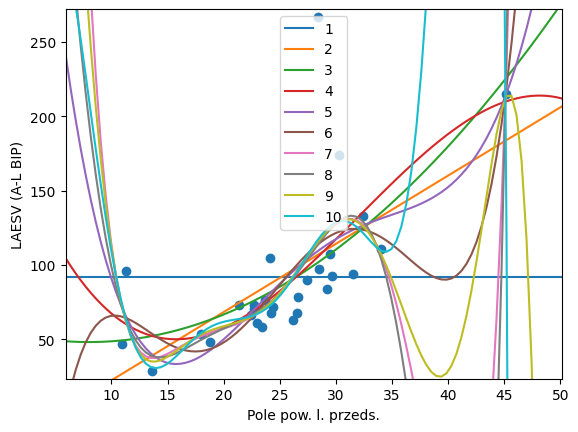

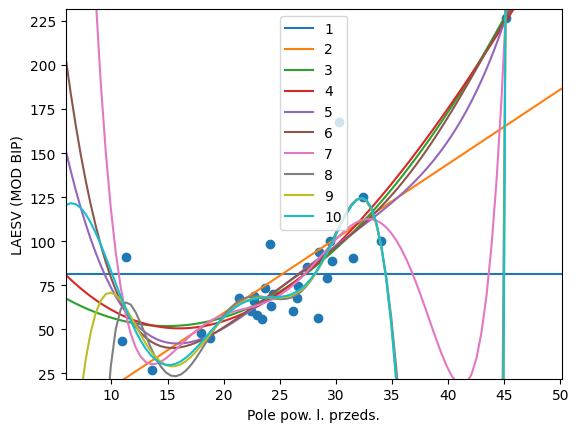

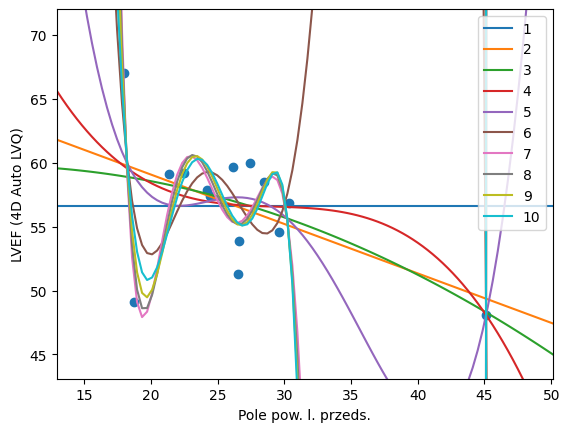

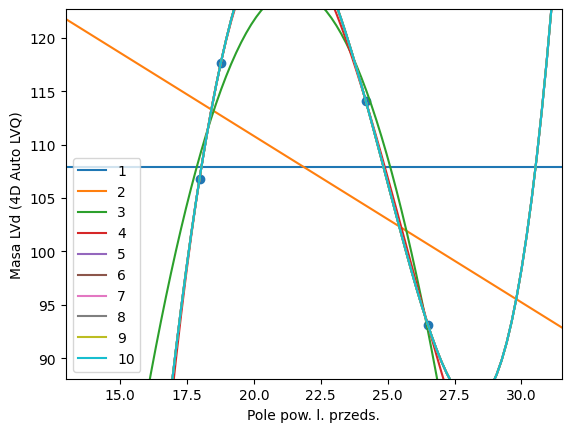

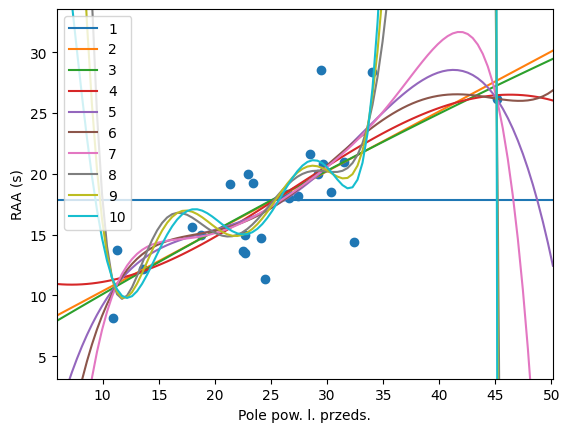

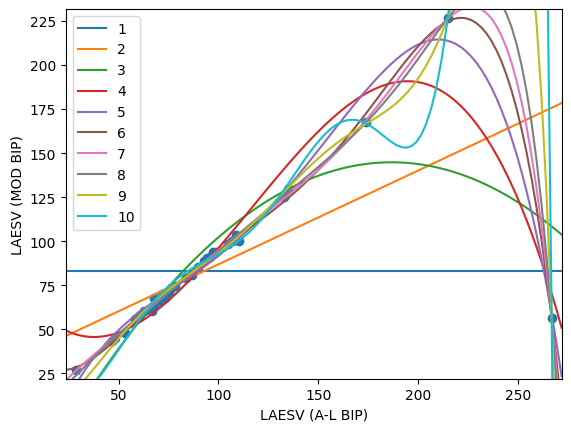

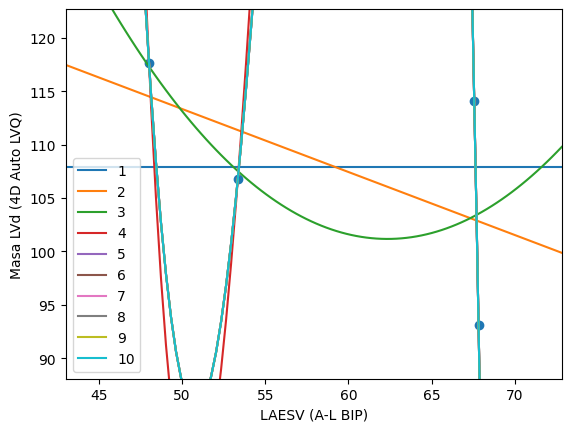

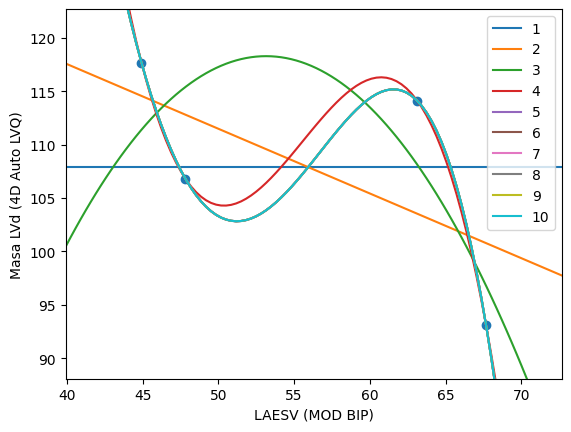

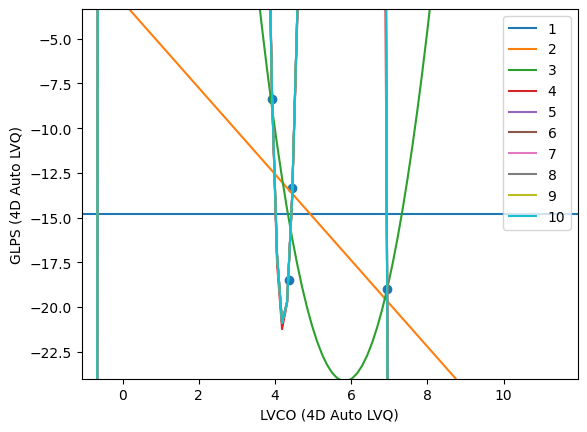

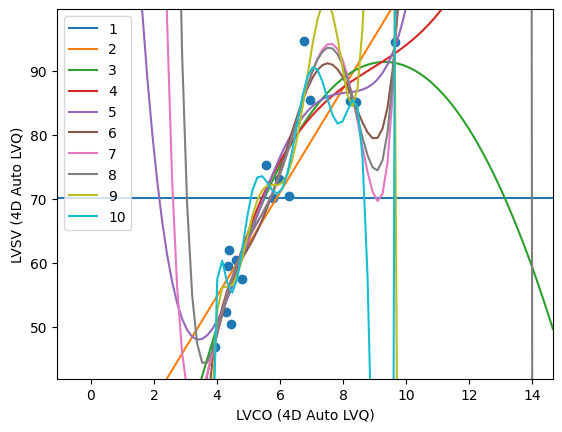

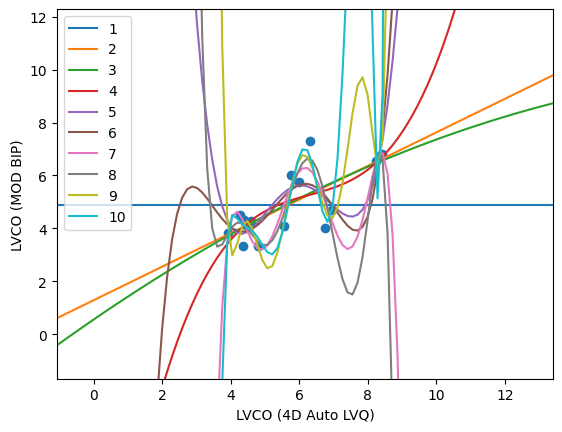

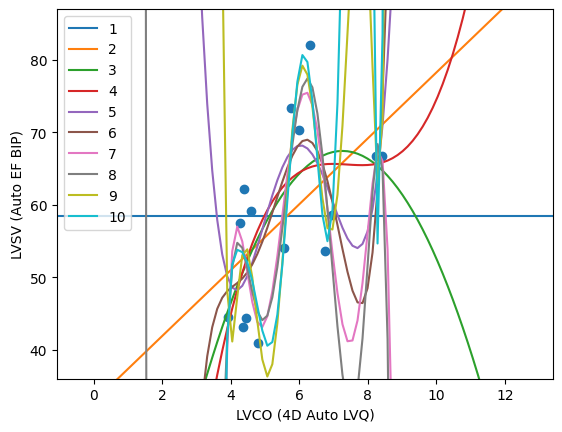

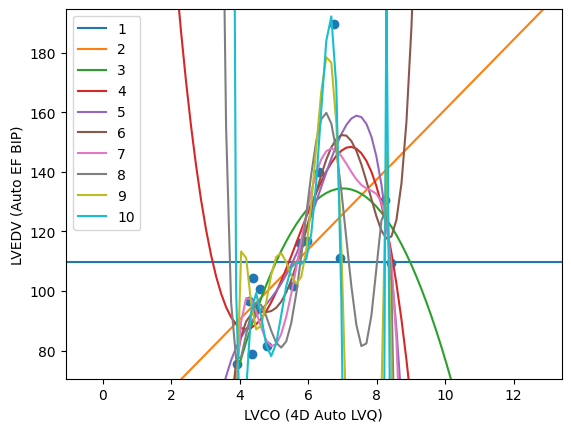

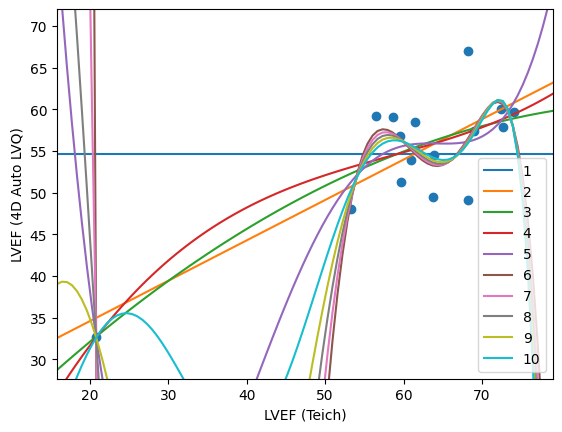

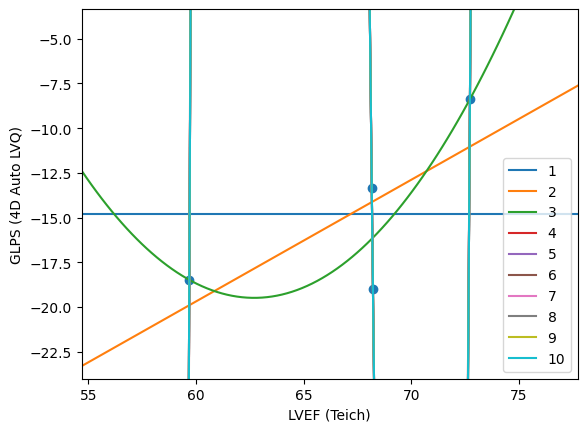

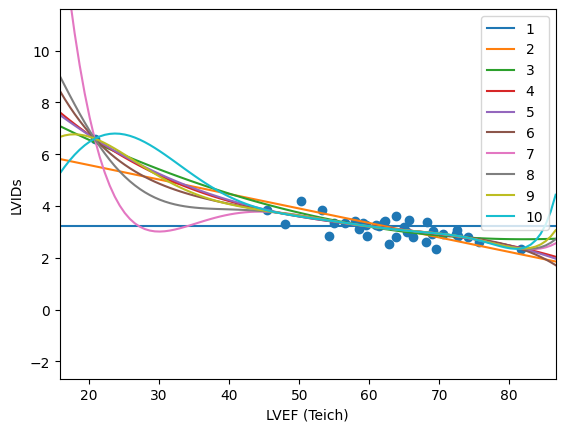

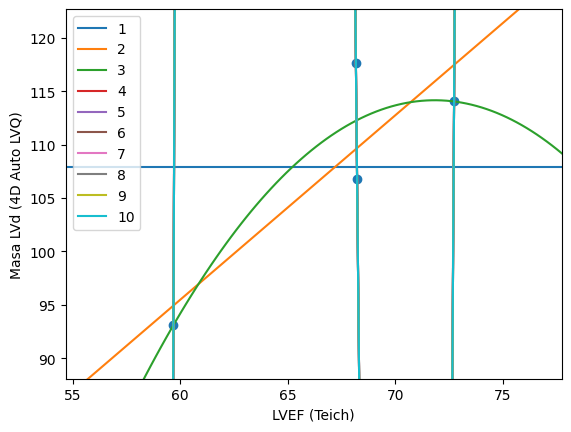

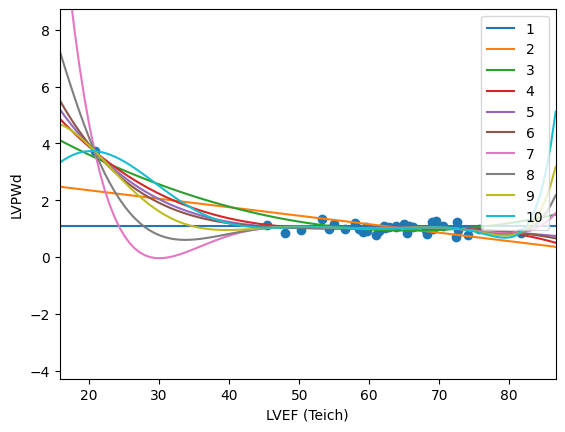

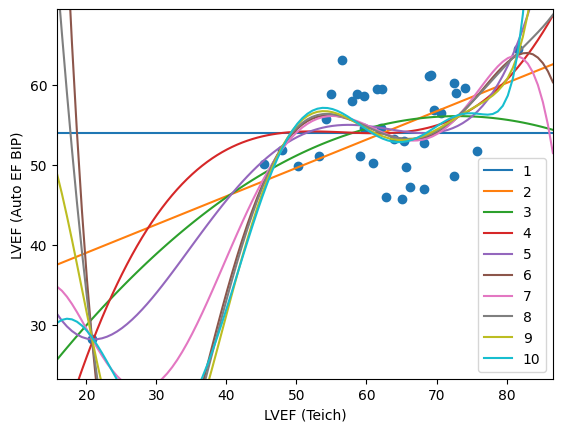

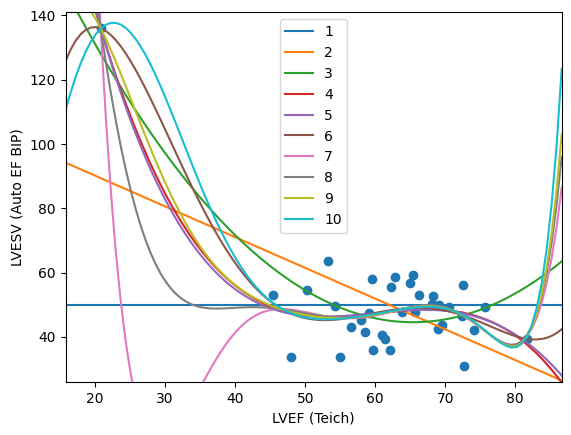

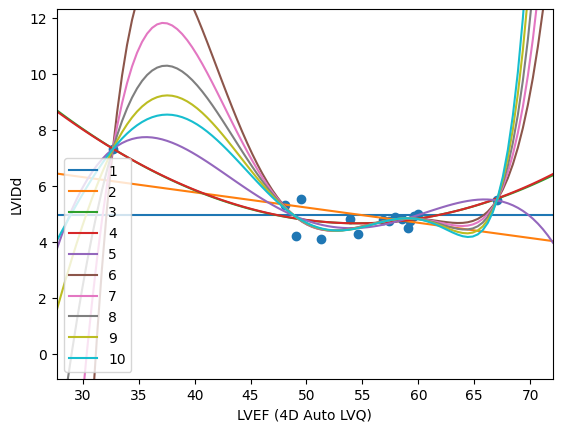

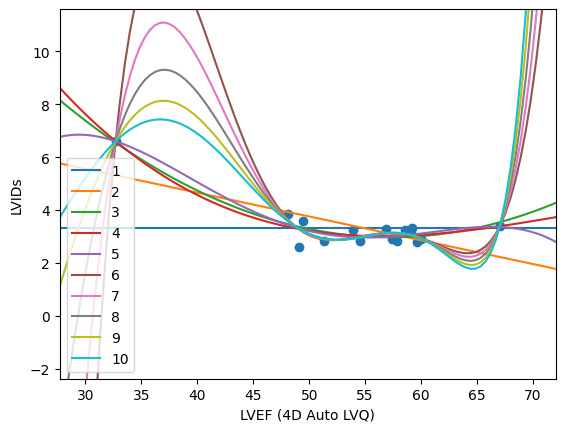

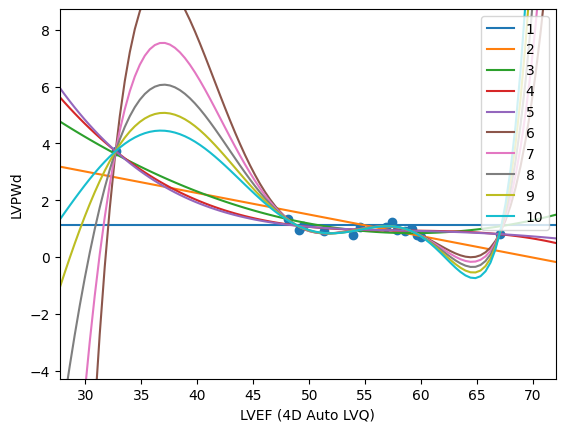

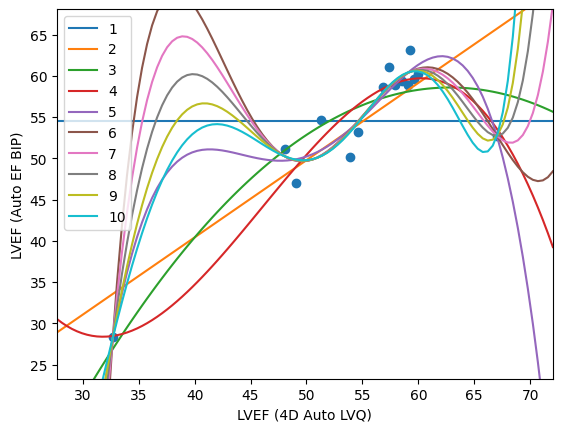

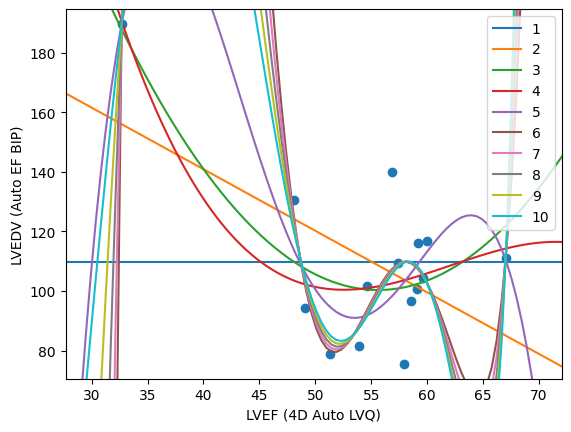

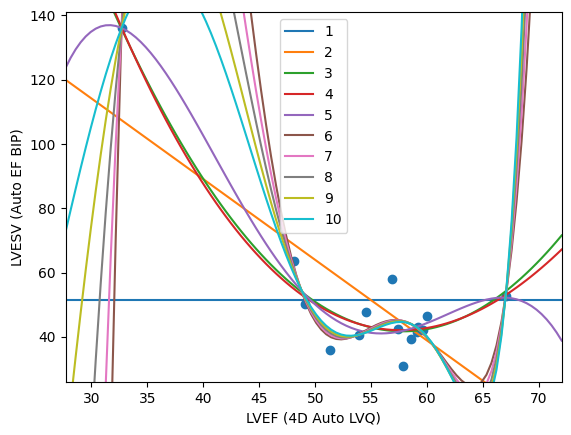

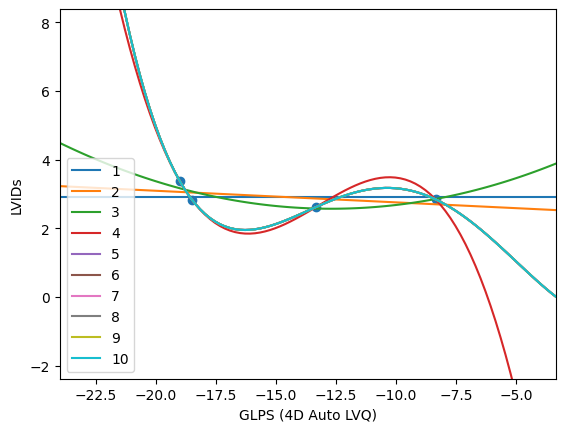

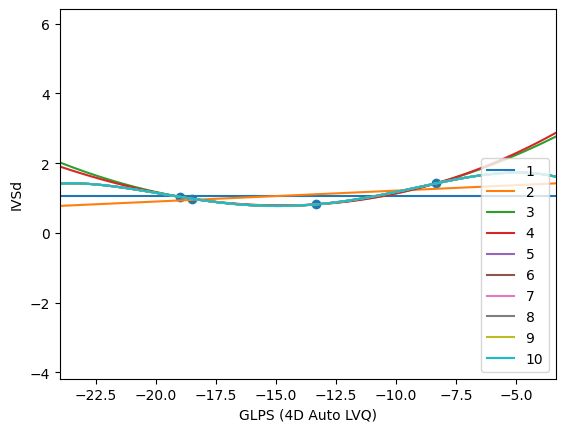

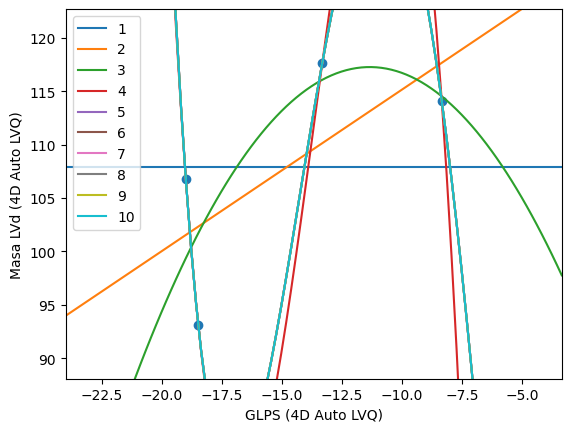

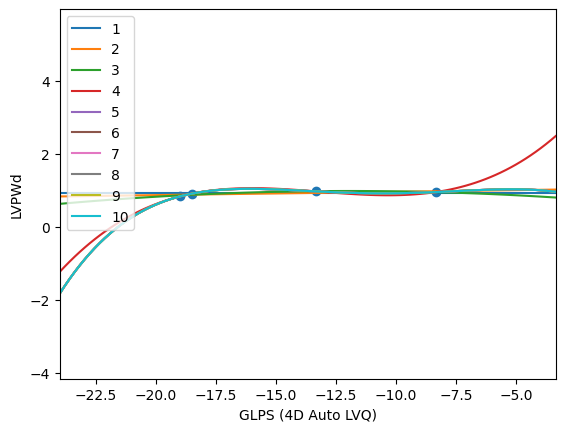

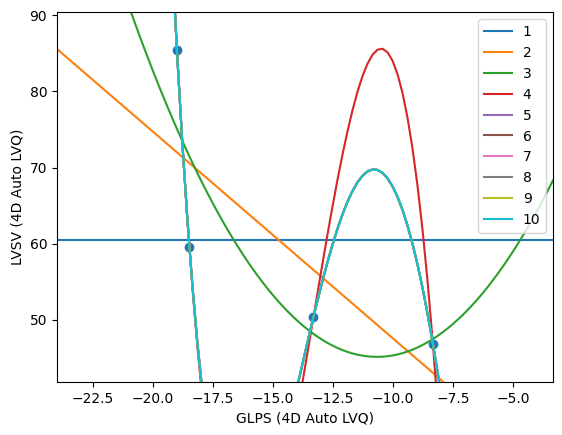

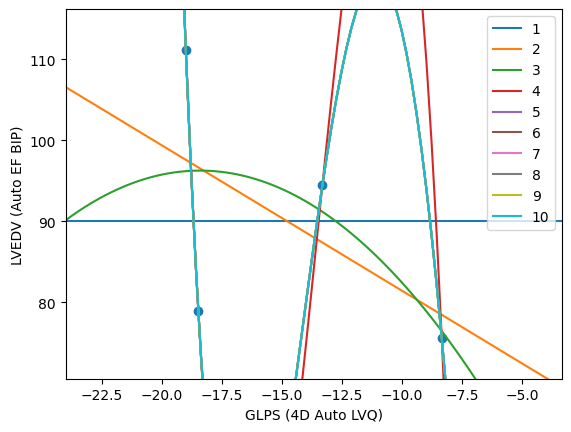

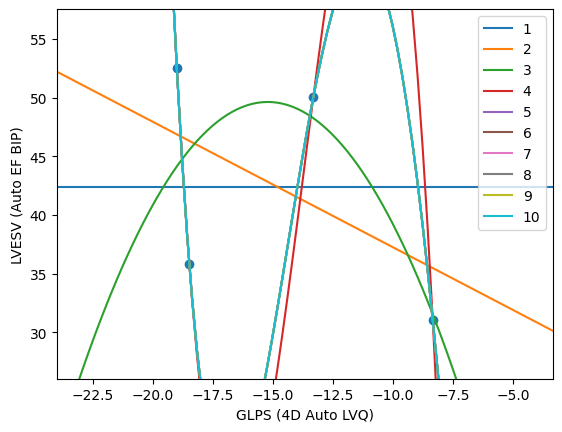

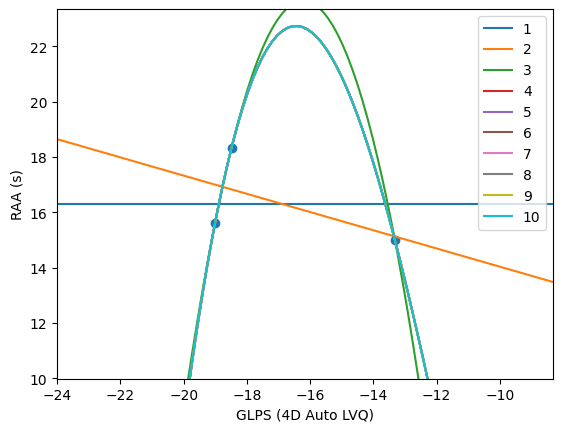

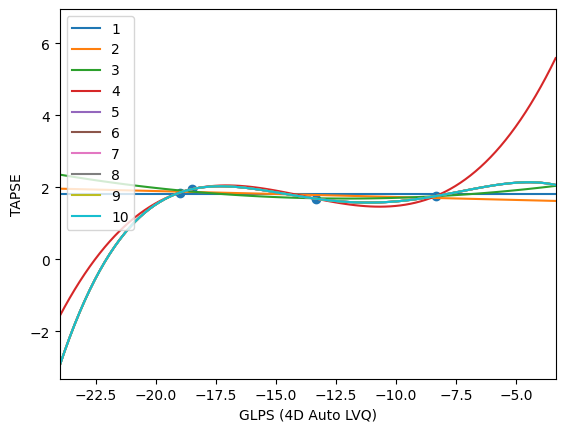

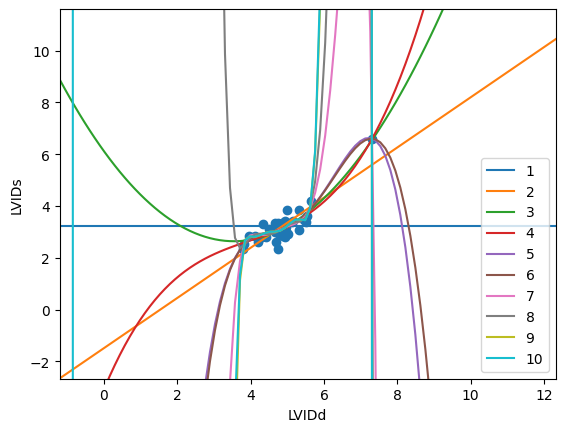

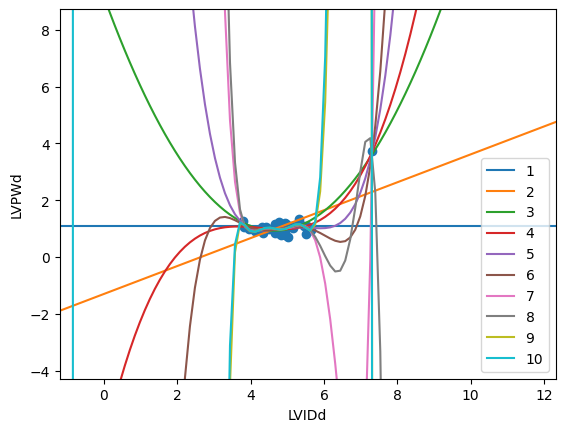

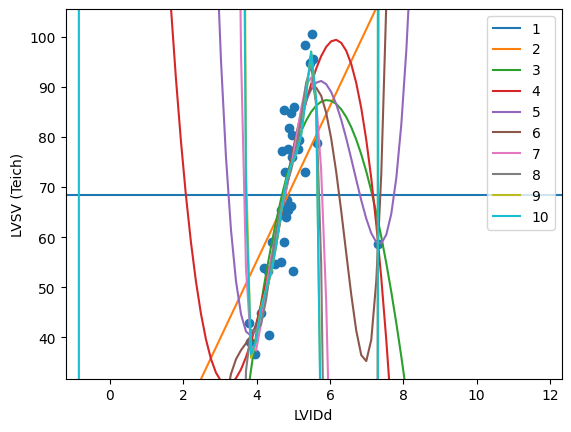

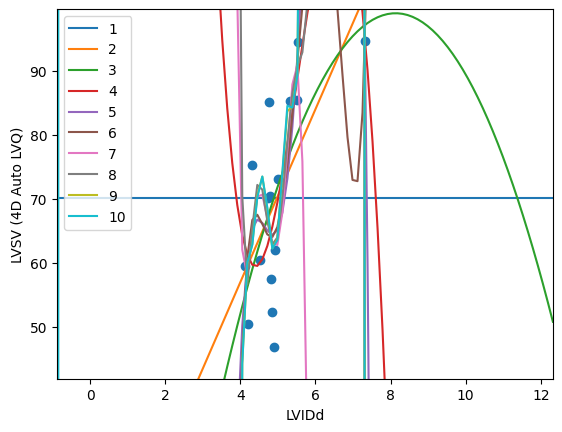

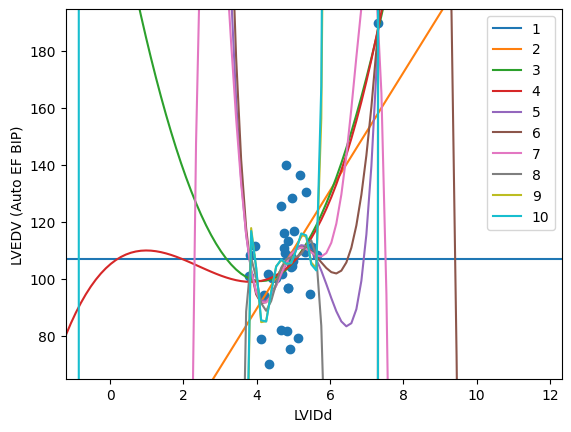

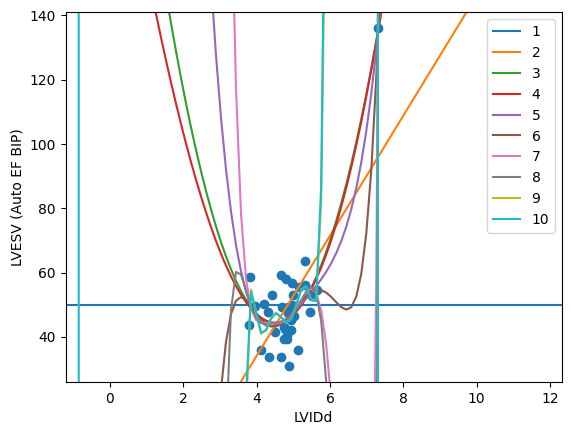

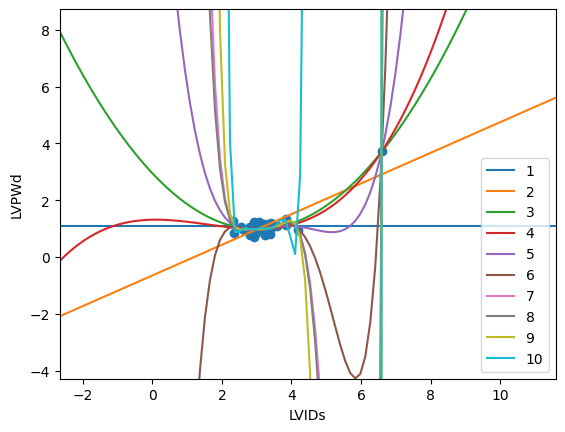

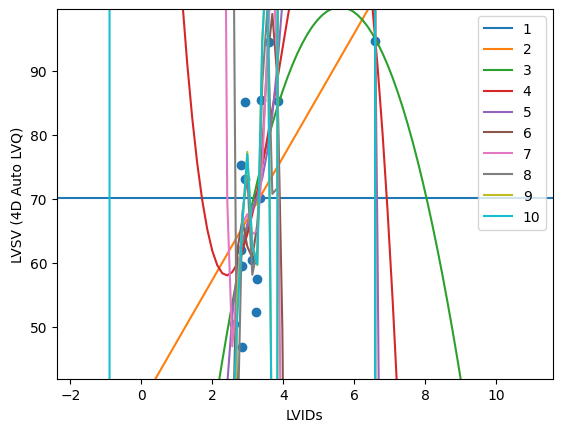

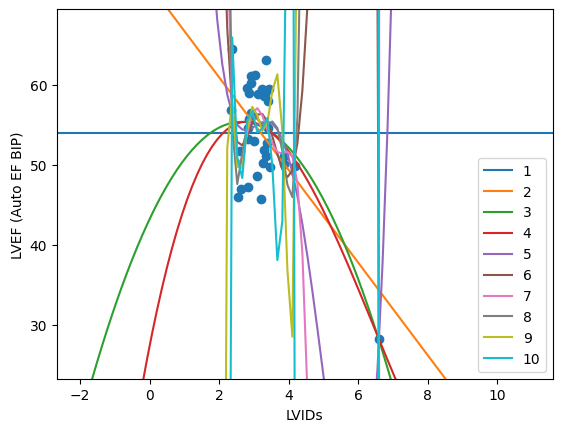

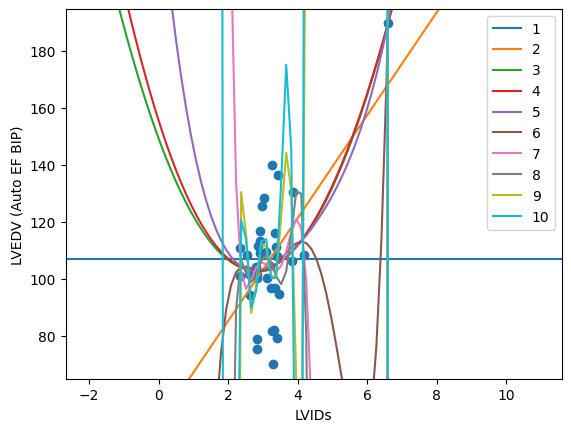

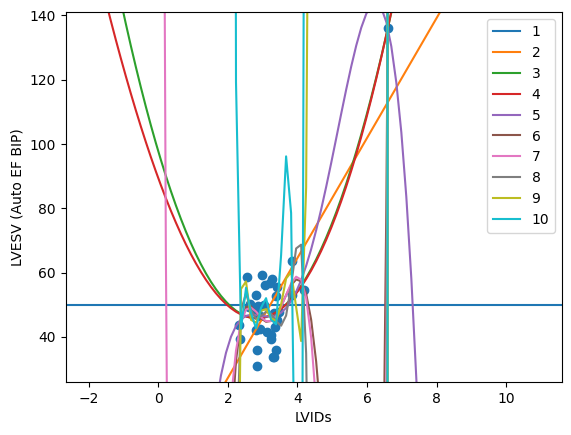

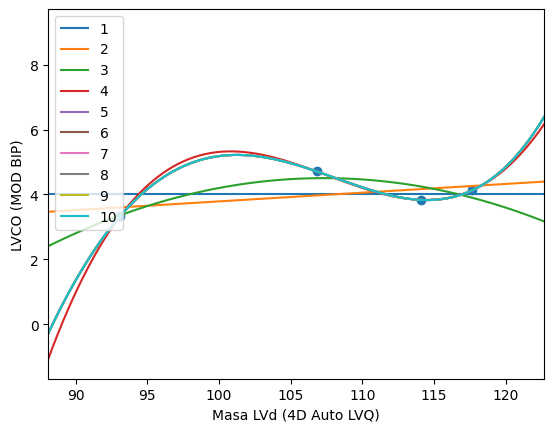

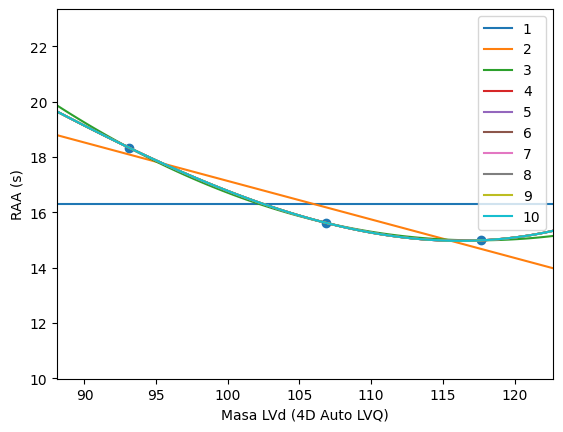

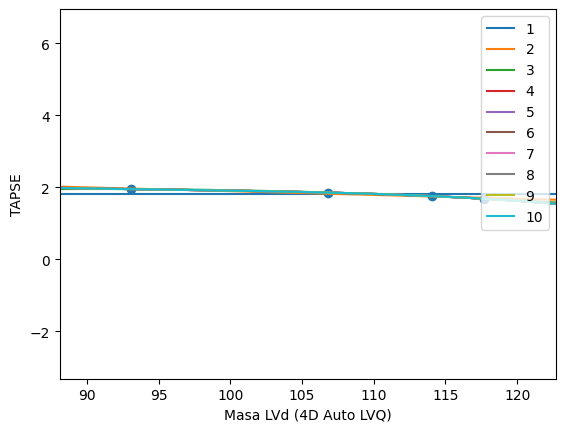

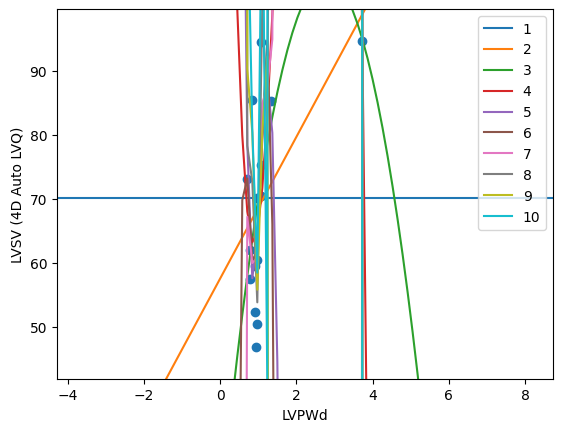

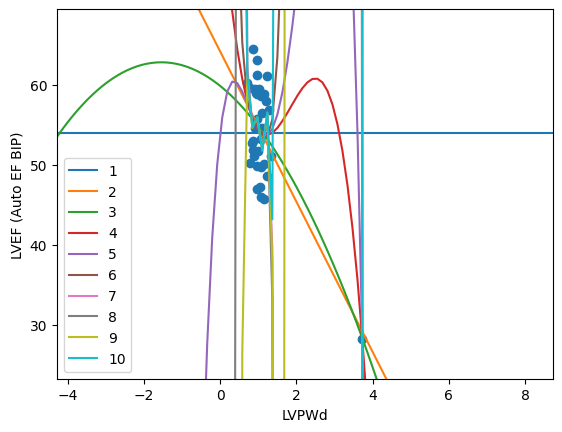

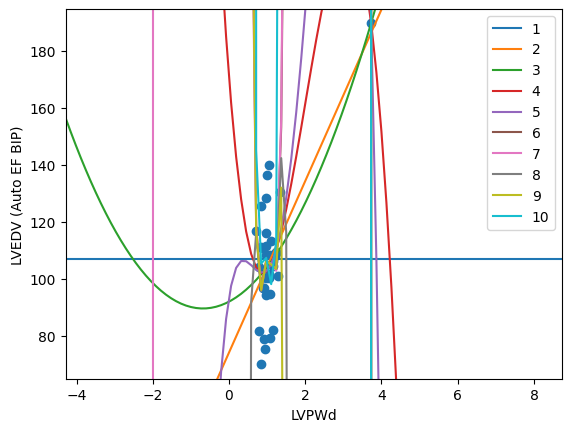

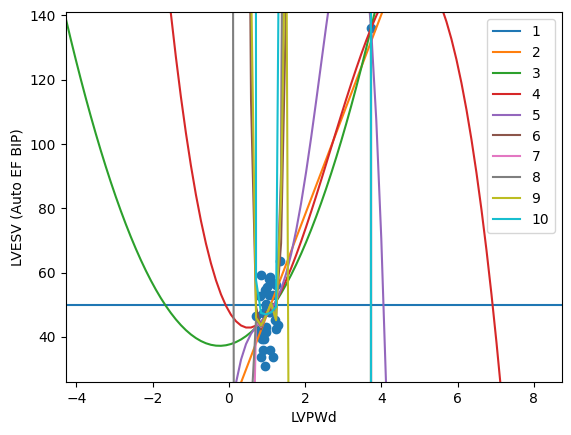

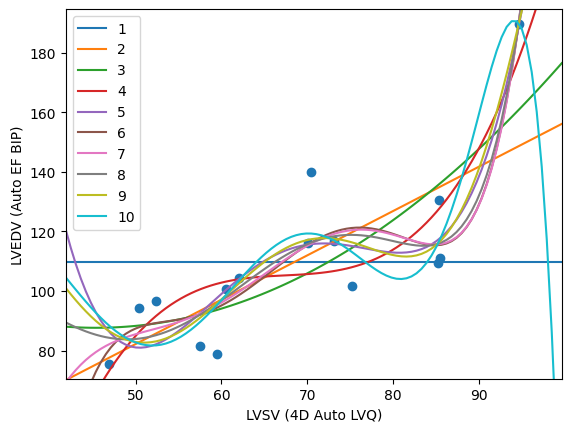

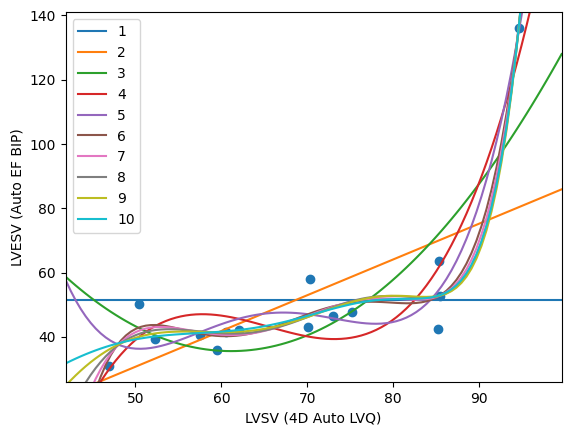

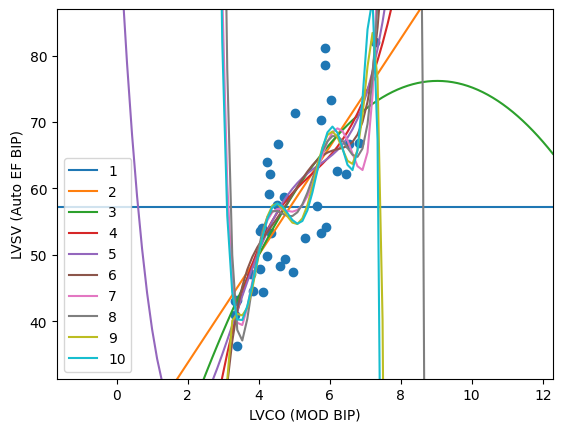

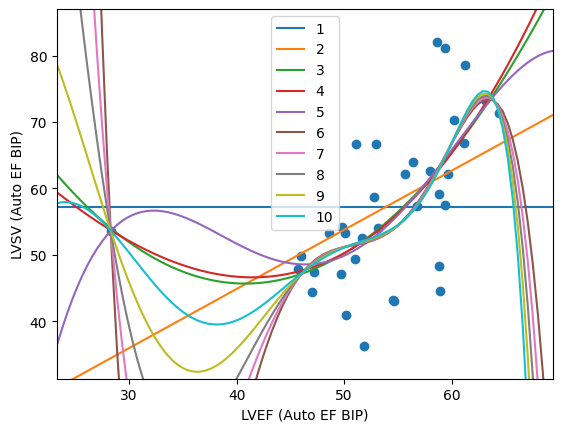

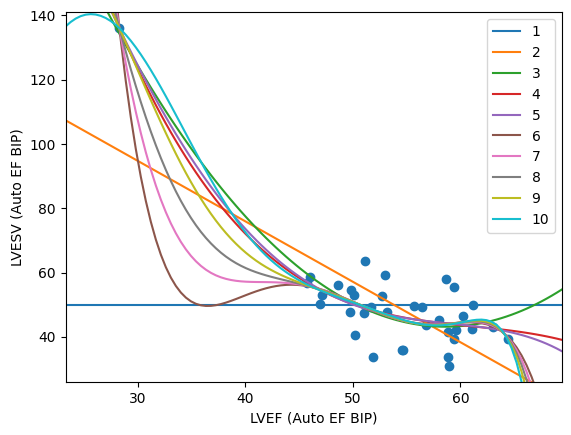

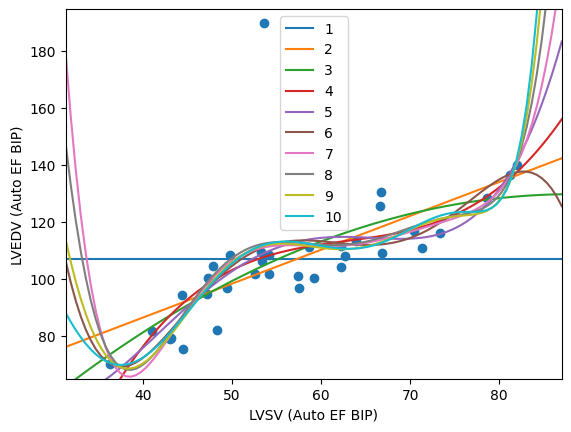

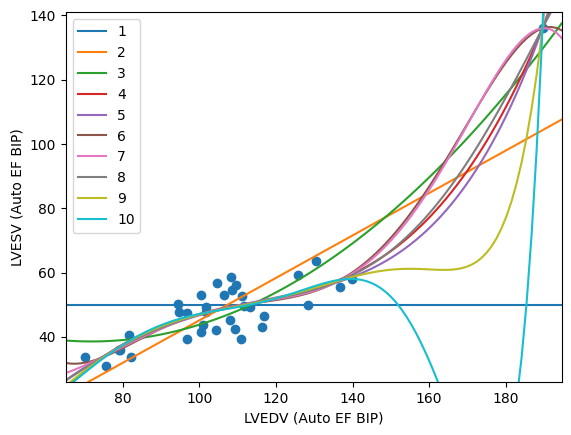

In [23]:
wartosci_do_plotowania = []

for krotka in skorelowane:
    x, y = krotka

    x = skalowane_dane[x]
    y = skalowane_dane[y]

    z = pd.DataFrame(zip(x,y)).dropna()
    wartosci_do_plotowania.append(z)


for index, krotka in enumerate(skorelowane):
            wart_reshaped = np.array(wartosci_do_plotowania[index][0]).reshape(-1,1)
            features = PolynomialFeatures(degree=len(wartosci_do_plotowania[index][0]))
            WART = features.fit_transform(wart_reshaped)

            data_points = 100
            generated_base_x = np.linspace(min(wartosci_do_plotowania[index][0])-5,max(wartosci_do_plotowania[index][0])+5,data_points)
            generated_base_y = np.sin(2*np.pi* generated_base_x)

            x_to_fit = generated_base_x
            x_to_fit_reshaped = x_to_fit.reshape(-1,1)
            x_fitting = features.fit_transform(x_to_fit_reshaped)


            linreg = LinearRegression(fit_intercept=False)

            for polynomial_order in range(1,11):
                fitting_values = linreg.fit(WART[:, :polynomial_order], wartosci_do_plotowania[index][1])
                fitted_values_to_model = fitting_values.predict(x_fitting[:,:polynomial_order])
                plt.plot(x_to_fit, fitted_values_to_model, label=str(polynomial_order))

            plt.scatter(wartosci_do_plotowania[index][0], wartosci_do_plotowania[index][1])
            plt.xlabel(krotka[0])
            plt.ylabel(krotka[1])
            plt.xlim(min(wartosci_do_plotowania[index][0])-5, max(wartosci_do_plotowania[index][0])+5)
            plt.ylim(min(wartosci_do_plotowania[index][1])-5, max(wartosci_do_plotowania[index][1])+5)
            plt.legend()
            plt.show()